# Avocado Prices - price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ignoring warnings for better presentation of the notebook
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("avocado.csv")

## Exploratory Data

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


we have no null values (good)

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
# Numbers of rows and columns 
print(f"Rows number: {df.shape[0]}")
print(f"Columns number: {df.shape[1]}")

Rows number: 18249
Columns number: 14


In [8]:
# Exrtacting the month from date
def extract(x):
    return x[5:7]
df['month'] = df['Date']
df['month'] = df['month'].apply(lambda x: extract(x))

In [9]:
df['month'].value_counts()

01    1944
03    1836
02    1728
10    1512
07    1512
05    1512
11    1404
08    1404
04    1404
12    1403
09    1296
06    1294
Name: month, dtype: int64

In [10]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

2017 has been the best year in terms of sales

In [11]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [12]:
len(df['region'].unique())

54

USA has only 50 states but we have 54 regions, so it doesn't refer to states. also we have a region called totalUS which refers to the whole country

## Data Cleaning


In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

the bags number should be a whole number (200 , 5000, etc...)

In [14]:
df['Small Bags'] = df['Small Bags'].apply(lambda x: int(x))
df['Large Bags'] = df['Large Bags'].apply(lambda x: int(x))
df['XLarge Bags'] = df['XLarge Bags'].apply(lambda x: int(x))

updating the total bags number

In [15]:
df['Total Bags'] = df['Small Bags'] + df['Large Bags'] + df['XLarge Bags']

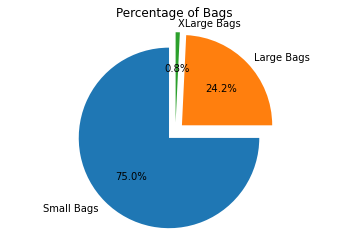

In [16]:
# Calculate the percentage of each type of bag
df['small_pct'] = df['Small Bags'] / df['Total Bags'] * 100
df['large_pct'] = df['Large Bags'] / df['Total Bags'] * 100
df['xlarge_pct'] = df['XLarge Bags'] / df['Total Bags'] * 100

# Create a pie chart showing the percentage of each bag type
labels = ['Small Bags', 'Large Bags', 'XLarge Bags']
sizes = [df['small_pct'].mean(), df['large_pct'].mean(), df['xlarge_pct'].mean()]
explode = (0.1, 0.1, 0.1)  # explode each slice slightly for emphasis

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # ensure that the pie is drawn as a circle
ax.set_title('Percentage of Bags')

plt.show()

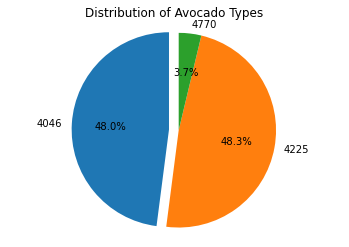

In [17]:
# Calculate the total volume of each type of avocado
total_4046 = df['4046'].sum()
total_4225 = df['4225'].sum()
total_4770 = df['4770'].sum()

# Create a pie chart showing the distribution of each type of avocado
sizes = [total_4046, total_4225, total_4770]
labels = ['4046', '4225', '4770']
explode = (0.1, 0, 0)  # explode the first slice slightly for emphasis

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # ensure that the pie is drawn as a circle
ax.set_title('Distribution of Avocado Types')

plt.show()

## Skewness

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

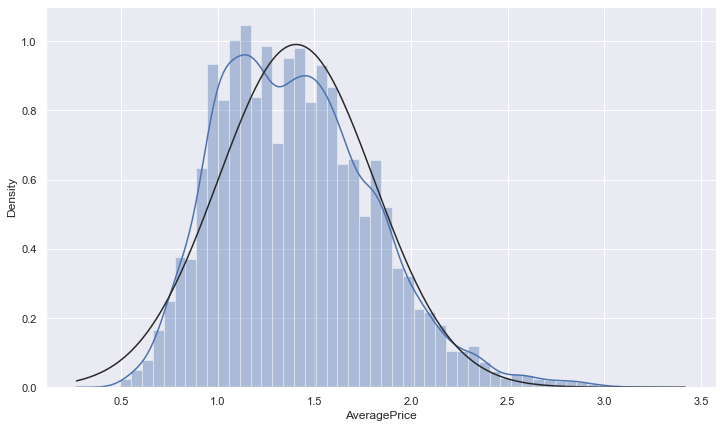

In [18]:
from scipy.stats import norm
plt.figure(figsize=(12, 7))
sns.set_theme(style='darkgrid')
sns.distplot(df['AveragePrice'], kde=True, fit=norm)

## Outliers

<AxesSubplot:>

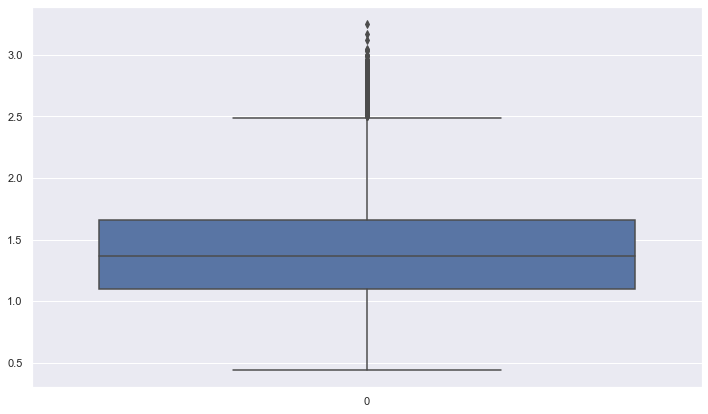

In [19]:
# using seaborn boxplot to identify outliers
plt.figure(figsize=(12, 7))
sns.boxplot(data=df['AveragePrice'])

We have a lot of outliers (above 2.5)

In [20]:
# removing outliers
mean = np.mean(df['AveragePrice'])
sigma = np.std(df['AveragePrice']) 
lower_range = mean - (3 * sigma)
upper_range = mean + (3 * sigma)
print(f"Data between {lower_range} and {upper_range} should be considered good data")

Data between 0.1979818422594828 and 2.6139749772922825 should be considered good data


In [21]:
# number of outliers
outliers = [
    outlier for outlier in df['AveragePrice'] if outlier < lower_range or outlier > upper_range
           ]
print(f"Outliers found: {len(outliers)}")

Outliers found: 131


## Preparing the dataset for our machine learning model

In [22]:
new_df = df[(df['AveragePrice'] > lower_range) & (df['AveragePrice'] < upper_range)]
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,small_pct,large_pct,xlarge_pct
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696,8603,93,0,conventional,2015,Albany,12,98.930543,1.069457,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505,9408,97,0,conventional,2015,Albany,12,98.979484,1.020516,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145,8042,103,0,conventional,2015,Albany,12,98.735421,1.264579,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5810,5677,133,0,conventional,2015,Albany,12,97.710843,2.289157,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183,5986,197,0,conventional,2015,Albany,11,96.813844,3.186156,0.0


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [24]:
# target and features
y = df['AveragePrice']
X = df.loc[:,['Total Volume','4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','month']]

In [25]:
y.shape

(18249,)

In [26]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
0,64236.62,1036.74,54454.85,48.16,8696,8603,93,0,2015,12
1,54876.98,674.28,44638.81,58.33,9505,9408,97,0,2015,12
2,118220.22,794.70,109149.67,130.50,8145,8042,103,0,2015,12
3,78992.15,1132.00,71976.41,72.58,5810,5677,133,0,2015,12
4,51039.60,941.48,43838.39,75.78,6183,5986,197,0,2015,11


## Data Preprocessing

In [27]:
X = pd.get_dummies(X)

## LinearRegression

In [28]:
# splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [29]:
# training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
# making predictions
prediction = lr.predict(X_test)
print(prediction)

[1.41478575 1.49847359 1.49186377 ... 1.64914746 1.55725562 1.59057181]


In [31]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, prediction)}")

Mean Absolute Error: 0.30347427863404525
